In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

In [2]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

In [3]:
# length of beam
L = 100. # units
# downward force applied at the center of the beam
P = -100. # units
# Elasticity
E = 29000. # units
# x-section Area of beam
A = 10. # units
# MOI through centroid of beaam
Iz = 500. # units

In [4]:
# define nodes
ops.node(1, 0., 0.)
ops.node(2, L/2., 0.)
ops.node(3, L, 0.)

<Axes: >

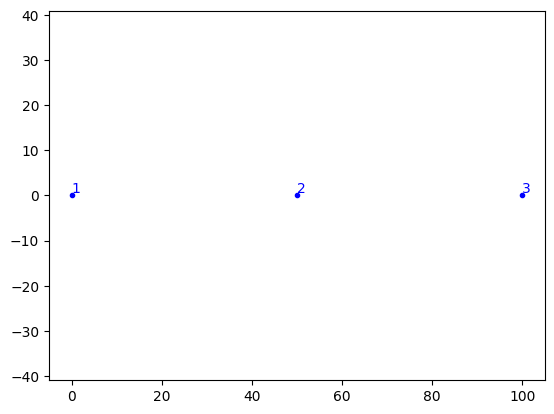

In [5]:
opsv.plot_model()

In [6]:
# boundary conditions
ops.fix(1, 1, 1, 0) # pin 
ops.fix(3, 0, 1, 0) # roller

In [7]:
# define elements
ops.geomTransf('Linear', 1)
# ops.element(elementType, elemTag, iNode, jNode, Area, E, Iz, transTag)
ops.element('elasticBeamColumn', 1, 1, 2, A, E, Iz, 1)
ops.element('elasticBeamColumn', 2, 2, 3, A, E, Iz, 1)

<Axes: >

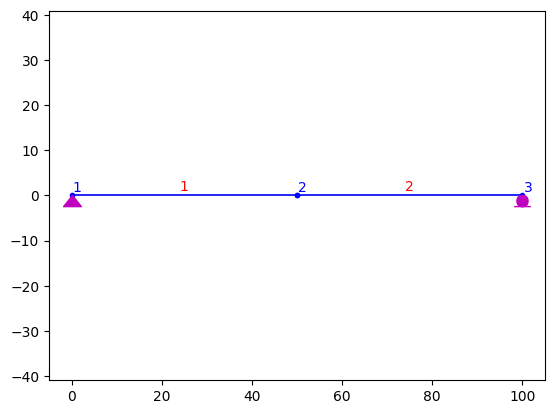

In [8]:
opsv.plot_model()

In [9]:
# loading
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)
ops.load(2, 0., P, 0.) # point load at mid

In [10]:
# analysis
ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandSPD')
ops.algorithm('Linear')
ops.integrator('LoadControl', 1.)
ops.analysis('Static')
ops.test('NormDispIncr', 1.0e-6, 10)

In [11]:
ops.analyze(1)

0

(np.float64(-50.00000000000002), np.float64(-50.00000000000002), <Axes: >)

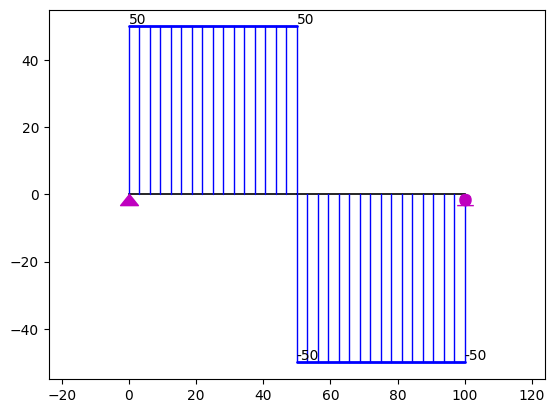

In [12]:
opsv.section_force_diagram_2d('V')

(np.float64(-9.094947017729282e-13), np.float64(2500.0), <Axes: >)

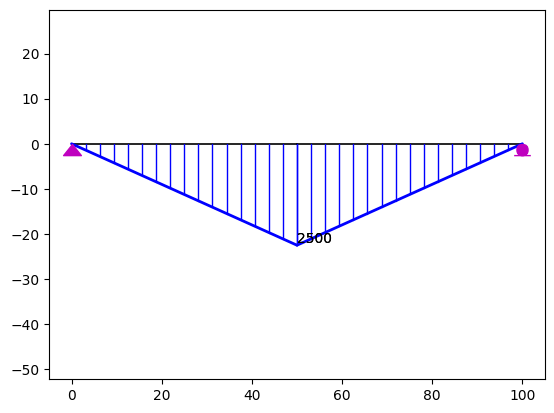

In [13]:
opsv.section_force_diagram_2d('M', sfac= 0.009)

In [14]:
ops.reactions()
print(f"The Reaction force at node 1 is {ops.nodeReaction(1, 2)}")
print(f"The Reaction force at node 3 is {ops.nodeReaction(3, 2)}")

The Reaction force at node 1 is 50.00000000000002
The Reaction force at node 3 is 50.00000000000002


<Axes: >

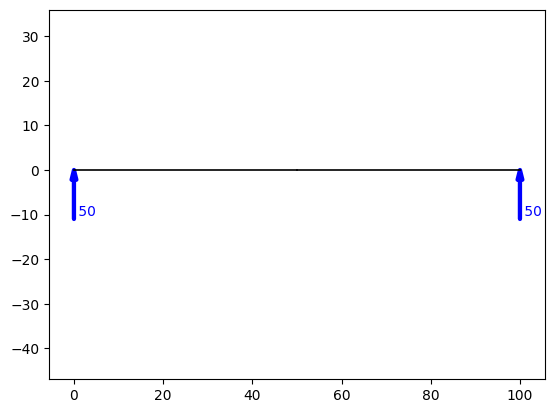

In [15]:
opsv.plot_reactions()

(100.0, <Axes: >)

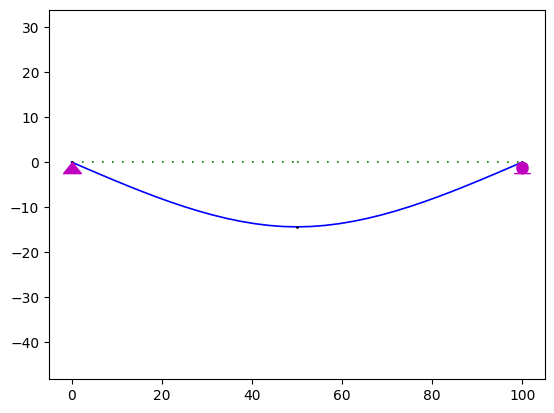

In [16]:
opsv.plot_defo(sfac=100.)

In [17]:
nodes_tag = ops.getNodeTags()
deflection = [abs(ops.nodeDisp(tag, 2)) for tag in nodes_tag]

In [18]:
print(f"The maximum displacement is {max(deflection)}")

The maximum displacement is 0.14367816091954022
